In [1]:
# This is the first of three code batches

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

In [3]:
# The metadata and file names for these are updated periodically. 
# Download the .csv files. You will need to modify the file names in the code below.

df1019 = pd.read_csv('Crime_Data_from_2010_to_2019_20260118.csv', parse_dates=['DATE OCC'])

# Downloaded from: https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z/about_data

df24 = pd.read_csv('Crime_Data_from_2020_to_Present_20260118.csv', parse_dates=['DATE OCC'])

# Downloaded: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data


/tmp/ipykernel_20876/437501697.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1019 = pd.read_csv('Crime_Data_from_2010_to_2019_20260118.csv', parse_dates=['DATE OCC'])
/tmp/ipykernel_20876/437501697.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df24 = pd.read_csv('Crime_Data_from_2020_to_Present_20260118.csv', parse_dates=['DATE OCC'])


In [4]:
# Combine the two data frames

newdf = pd.concat([df1019, df24], ignore_index=True)

In [5]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138128 entries, 0 to 3138127
Data columns (total 29 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DR_NO           int64         
 1   Date Rptd       object        
 2   DATE OCC        datetime64[ns]
 3   TIME OCC        int64         
 4   AREA            float64       
 5   AREA NAME       object        
 6   Rpt Dist No     int64         
 7   Part 1-2        int64         
 8   Crm Cd          int64         
 9   Crm Cd Desc     object        
 10  Mocodes         object        
 11  Vict Age        int64         
 12  Vict Sex        object        
 13  Vict Descent    object        
 14  Premis Cd       float64       
 15  Premis Desc     object        
 16  Weapon Used Cd  float64       
 17  Weapon Desc     object        
 18  Status          object        
 19  Status Desc     object        
 20  Crm Cd 1        float64       
 21  Crm Cd 2        float64       
 22  Crm Cd 3        fl

In [6]:
# Break out the year for the crime date

newdf['YEAR'] = (newdf['DATE OCC']).dt.year

In [7]:
newdf.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA,YEAR
0,1307355,2010 Feb 20 12:00:00 AM,2010-02-20,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN,2010
1,11401303,2010 Sep 13 12:00:00 AM,2010-09-12,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN,2010
2,70309629,2010 Aug 09 12:00:00 AM,2010-08-09,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN,2010
3,90631215,2010 Jan 05 12:00:00 AM,2010-01-05,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN,2010
4,100100501,2010 Jan 03 12:00:00 AM,2010-01-02,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",...,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN,2010


In [8]:
# The City of Los Angeles switched to a new data reporting system on March 7, 2024. 
# Events occurring after this date are not included in this dataset.
# We narrow the dataset to the 2010-2023 time frame  

year_filter=newdf['YEAR']<=2023
filtered_df = newdf[year_filter].copy()

In [9]:
# What crimes does the City of Los Angeles track?
pd.set_option('display.max_rows', None)
filtered_df['Crm Cd Desc'].value_counts()

Crm Cd Desc
BATTERY - SIMPLE ASSAULT                                    260541
VEHICLE - STOLEN                                            254556
BURGLARY FROM VEHICLE                                       217236
BURGLARY                                                    201930
THEFT PLAIN - PETTY ($950 & UNDER)                          195308
THEFT OF IDENTITY                                           186833
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     163279
INTIMATE PARTNER - SIMPLE ASSAULT                           158442
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              143073
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             122899
ROBBERY                                                     114157
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    113857
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    104010
CRIMINAL THREATS - NO WEAPON DISPLAYED                       74766
SHOPLIFTING - PETTY THEFT ($950 & UNDER)          

In [10]:
# How many different categories of crime are tracked?
crime_categories= filtered_df['Crm Cd Desc'].value_counts().nunique()
print("Categories of crime tracked:")
print(f"{crime_categories:,}")

Categories of crime tracked:
138


In [11]:
# How many crimes in total?
crime_tally = filtered_df['Crm Cd Desc'].value_counts().sum()
print("Total reported crimes 2010-2023:")
print(f"{crime_tally:,}")

Total reported crimes 2010-2023:
3,010,464


In [12]:
# The crime data is quite detailed
# For this analysis, it may be more helpful to classify crimes in broader categories
# https://www.justia.com/criminal/offenses/
# Against Person
# Against Property
# Inchoate (attempted crimes)
# Statutory
# Financial

crime_category_dict = {
    'VEHICLE - STOLEN': 'Property',                                           
    'BATTERY - SIMPLE ASSAULT': 'Person',                                    
    'BURGLARY FROM VEHICLE': 'Property',                                       
    'BURGLARY': 'Property',                                                    
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Property',                          
    'THEFT OF IDENTITY': 'Property',                                           
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Property',     
    'INTIMATE PARTNER - SIMPLE ASSAULT': 'Person',                           
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Person',           
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Property',             
    'ROBBERY': 'Property',                                                     
    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)': 'Property',                    
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Property',    
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Property',                     
    'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'Person',                       
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Property',          
    'TRESPASSING': 'Statutory',                                                  
    'VIOLATION OF RESTRAINING ORDER': 'Statutory',                               
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'Statutory',                      
    'BRANDISH WEAPON': 'Statutory',                                           
    'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'Person',                        
    'OTHER MISCELLANEOUS CRIME': 'Statutory',                                    
    'VIOLATION OF COURT ORDER': 'Statutory',                                     
    'DOCUMENT FORGERY / STOLEN FELONY': 'Property',                             
    'BIKE - STOLEN': 'Property',                                                
    'THEFT, PERSON': 'Property',                                                
    'ATTEMPTED ROBBERY': 'Inchoate',                                            
    'BURGLARY, ATTEMPTED': 'Inchoate',                                          
    'BATTERY WITH SEXUAL CONTACT': 'Person',                                  
    'BUNCO, GRAND THEFT': 'Statutory',                                       
    'RAPE, FORCIBLE': 'Person',                                               
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'Person',                      
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 'Financial',                   
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'Person',     
    'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Property',                     
    'OTHER ASSAULT': 'Person',                                                 
    'BUNCO, PETTY THEFT': 'Statutory',                                            
    'BATTERY POLICE (SIMPLE)': 'Person',                                       
    'VEHICLE - ATTEMPT STOLEN': 'Inchoate',                                      
    'DISCHARGE FIREARMS/SHOTS FIRED': 'Statutory',                                
    'CONTEMPT OF COURT': 'Statutory',                                             
    'CHILD NEGLECT (SEE 300 W.I.C.)': 'Person',                                
    'CHILD ANNOYING (17YRS & UNDER)': 'Person',                                
    'ARSON': 'Property',                                                         
    'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ': 'Statutory',  
    'DISTURBING THE PEACE': 'Statutory',                                          
    'PICKPOCKET': 'Property',                                                    
    'INDECENT EXPOSURE': 'Statutory',                                             
    'EXTORTION': 'Statutory',                                                     
    'SEXUAL PENETRATION W/FOREIGN OBJECT': 'Person',                           
    'CRIMINAL HOMICIDE': 'Person',                                             
    'RESISTING ARREST': 'Statutory',                                              
    'SHOTS FIRED AT INHABITED DWELLING': 'Property',                             
    'THREATENING PHONE CALLS/LETTERS': 'Person',                               
    'BURGLARY FROM VEHICLE, ATTEMPTED': 'Property',                              
    'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)': 'Property',      
    'ORAL COPULATION': 'Person',                                               
    'KIDNAPPING': 'Person',                                                    
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'Person',                  
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE': 'Statutory',                     
    'STALKING': 'Statutory',                                                      
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER': 'Property',          
    'THROWING OBJECT AT MOVING VEHICLE': 'Property',                             
    'VIOLATION OF TEMPORARY RESTRAINING ORDER': 'Statutory',                      
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT': 'Person',                   
    'FAILURE TO YIELD': 'Statutory',                                              
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'Person',       
    'THEFT PLAIN - ATTEMPT': 'Property',                                         
    'LEWD CONDUCT': 'Statutory',                                                  
    'THEFT FROM MOTOR VEHICLE - ATTEMPT': 'Inchoate',                            
    'UNAUTHORIZED COMPUTER ACCESS': 'Statutory',                                  
    'BOMB SCARE': 'Statutory',                                                    
    'CHILD STEALING': 'Statutory',                                               
    'PEEPING TOM': 'Statutory',                                                   
    'CRUELTY TO ANIMALS': 'Statutory',                                            
    'RAPE, ATTEMPTED': 'Inchoate',                                               
    'FALSE IMPRISONMENT': 'Person',                                            
    'PURSE SNATCHING': 'Property',                                               
    'PROWLER': 'Statutory',                                                       
    'BUNCO, ATTEMPT': 'Inchoate',                                               
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 'Person',                        
    'COUNTERFEIT': 'Financial',                                                   
    'KIDNAPPING - GRAND ATTEMPT': 'Person',                                     
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)': 'Property',                       
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT': 'Property',               
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)': 'Financial',                       
    'DRIVING WITHOUT OWNER CONSENT (DWOC)': 'Statutory',                           
    'PIMPING': 'Statutory',                                                        
    'ILLEGAL DUMPING': 'Statutory',                                                
    'FALSE POLICE REPORT': 'Statutory',                                            
    'BATTERY ON A FIREFIGHTER': 'Person',                                       
    'RECKLESS DRIVING': 'Statutory',                                               
    'CHILD PORNOGRAPHY': 'Statutory',                                              
    'PANDERING': 'Statutory',                                                      
    'BOAT - STOLEN': 'Property',                                                  
    'DOCUMENT WORTHLESS ($200.01 & OVER)': 'Property',                            
    'CREDIT CARDS, FRAUD USE ($950 & UNDER': 'Property',                          
    'THEFT FROM PERSON - ATTEMPT': 'Inchoate',                                    
    'LEWD/LASCIVIOUS ACTS WITH CHILD': 'Person',                                
    'SHOPLIFTING - ATTEMPT': 'Inchoate',                                          
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01': 'Property',          
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)': 'Property',                    
    'CONTRIBUTING': 'Inchoate',                                                  
    'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE': 'Person',                     
    'WEAPONS POSSESSION/BOMBING': 'Statutory',                                   
    'DISHONEST EMPLOYEE - GRAND THEFT': 'Property',                               
    'DISHONEST EMPLOYEE - PETTY THEFT': 'Property',                               
    'CHILD ABANDONMENT': 'Person',                                              
    'TILL TAP - PETTY ($950 & UNDER)': 'Property',                                
    'DOCUMENT WORTHLESS ($200 & UNDER)': 'Property',                              
    'GRAND THEFT / INSURANCE FRAUD': 'Property',                                   
    'CONSPIRACY': 'Inchoate',                                                    
    'DRUNK ROLL': 'Property',                                                      
    'LYNCHING': 'Person',                                                        
    'PURSE SNATCHING - ATTEMPT': 'Inchoate',                                       
    'DISRUPT SCHOOL': 'Statutory',                                                  
    'DRUGS, TO A MINOR': 'Statutory',                                               
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)': 'Property',                    
    'BIKE - ATTEMPTED STOLEN': 'Inchoate',                                         
    'TELEPHONE PROPERTY - DAMAGE': 'Property',                                     
    'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)': 'Statutory',        
    'BRIBERY': 'Statutory',                                                          
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM': 'Statutory',        
    'INCITING A RIOT': 'Statutory',                                                 
    'LYNCHING - ATTEMPTED': 'Inchoate',                                            
    'TILL TAP - GRAND THEFT ($950.01 & OVER)': 'Property',                         
    'THEFT, COIN MACHINE - ATTEMPT': 'Property',                                   
    'PETTY THEFT - AUTO REPAIR': 'Property',                                       
    'PICKPOCKET, ATTEMPT': 'Inchoate',                                             
    'FAILURE TO DISPERSE': 'Statutory',                                             
    'BIGAMY': 'Statutory',                                                          
    'GRAND THEFT / AUTO REPAIR': 'Property',                                       
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)': 'Statutory',                    
    'MANSLAUGHTER, NEGLIGENT': 'Person',                                         
    'DISHONEST EMPLOYEE ATTEMPTED THEFT': 'Property',                              
    'BLOCKING DOOR INDUCTION CENTER': 'Statutory',                                   
    'ABORTION/ILLEGAL': 'Statutory',                                                
    'FIREARMS RESTRAINING ORDER (FIREARMS RO)': 'Statutory',                         
    'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)': 'Statutory',               
    'TRAIN WRECKING': 'Property',                                                   
    'TILL TAP - ATTEMPT': 'Inchoate',                                               
    'DRUNK ROLL - ATTEMPT': 'Inchoate',                                             
    'FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)': 'Statutory'    
}

filtered_df['Crime Category'] = filtered_df['Crm Cd Desc'].map(crime_category_dict)

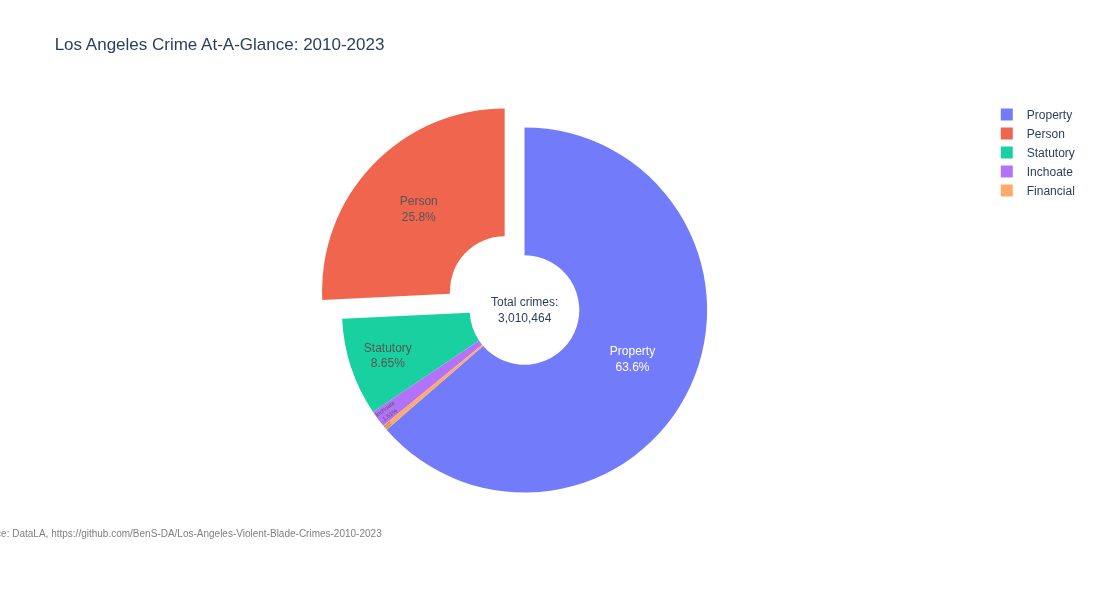

In [13]:
category = filtered_df['Crime Category'].value_counts()
grand_total = category.sum()
formatted = f'{grand_total:,}'

la_crime = px.pie(
    category, values=category.values,
    names=category.index,
    title='Los Angeles Crime At-A-Glance: 2010-2023',
    labels={'Property': "Property Crimes", 'Person': "Crimes Against Persons", 'Statutory': "Violation of Regulations", 'Inchoate': "Attempted Crimes", 'Financial': "White Collar Crimes"},
    opacity=0.9,
    hole=0.3,
    height = 600,
    width = 600
)
la_crime.update_traces(textposition='inside', textinfo='label+percent')
la_crime.update_traces(pull=[0,0.15,0,0,0])

la_crime.add_annotation(x=0.5, y=0.5, text='Total crimes:<br>'+f'{formatted}', showarrow=False)

la_crime.add_annotation(
    text=f"Source: DataLA, https://github.com/BenS-DA/Los-Angeles-Violent-Blade-Crimes-2010-2023",
    showarrow=False,
    x=-0.12,
    y=-0.05,
    xref="paper",
    yref="paper",
    xanchor="left",
    yanchor="bottom",
    font=dict(size=10, color="grey"),
    align="left"
)

la_crime.show()


In [14]:
# Breakdown of crimes against persons

person = filtered_df['Crime Category'] == 'Person'
print("Crimes Against Persons:")
filtered_df[person]['Crm Cd Desc'].value_counts()

Crimes Against Persons:


Crm Cd Desc
BATTERY - SIMPLE ASSAULT                                    260541
INTIMATE PARTNER - SIMPLE ASSAULT                           158442
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              143073
CRIMINAL THREATS - NO WEAPON DISPLAYED                       74766
INTIMATE PARTNER - AGGRAVATED ASSAULT                        27551
BATTERY WITH SEXUAL CONTACT                                  15494
RAPE, FORCIBLE                                               14490
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT                      12758
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)     11366
OTHER ASSAULT                                                 8144
BATTERY POLICE (SIMPLE)                                       7265
CHILD NEGLECT (SEE 300 W.I.C.)                                6354
CHILD ANNOYING (17YRS & UNDER)                                6206
SEXUAL PENETRATION W/FOREIGN OBJECT                           4303
CRIMINAL HOMICIDE                                 

In [15]:
# Export above to a .csv file
export = filtered_df[person]['Crm Cd Desc'].value_counts()
export.to_csv('crimes_v_persons.csv')

In [16]:
# Let's track the weapons used in crimes

pd.set_option('display.max_rows', None)
filtered_df['Weapon Desc'].value_counts()

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    597667
UNKNOWN WEAPON/OTHER WEAPON                        90709
VERBAL THREAT                                      81153
HAND GUN                                           52952
SEMI-AUTOMATIC PISTOL                              19847
KNIFE WITH BLADE 6INCHES OR LESS                   19334
OTHER KNIFE                                        15364
UNKNOWN FIREARM                                    14038
VEHICLE                                            10314
MACE/PEPPER SPRAY                                   7556
BOTTLE                                              7330
ROCK/THROWN OBJECT                                  7194
STICK                                               6706
REVOLVER                                            6692
FOLDING KNIFE                                       6370
CLUB/BAT                                            6362
BLUNT INSTRUMENT                                    5582
KITCHEN KNIFE      

In [17]:
# Let's consolidate these weapon descriptions into more general categories

Weapon_Dict = {
'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)': 'Empty Hands/Feet',
'UNKNOWN WEAPON/OTHER WEAPON': 'Unknown or Other Weapon',
'VERBAL THREAT': 'Verbal Threat',
'HAND GUN': 'Firearm',
'SEMI-AUTOMATIC PISTOL': 'Firearm',
'KNIFE WITH BLADE 6INCHES OR LESS': 'Blade',
'OTHER KNIFE': 'Blade',
'UNKNOWN FIREARM':'Firearm',
'VEHICLE': 'Vehicle',
'MACE/PEPPER SPRAY': 'Mace or Pepper Spray',
'BOTTLE': 'Bottle',
'ROCK/THROWN OBJECT': 'Bludgeoning Instrument',
'STICK': 'Bludgeoning Instrument',
'REVOLVER':'Firearm',
'FOLDING KNIFE': 'Blade',
'CLUB/BAT': 'Bludgeoning Instrument',       
'KITCHEN KNIFE': 'Blade', 
'BLUNT INSTRUMENT': 'Bludgeoning Instrument',
'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH': 'Blade', 
'SIMULATED GUN': 'Fake Firearm or Air Gun',
'PIPE/METAL PIPE': 'Bludgeoning Instrument',                                   
'AIR PISTOL/REVOLVER/RIFLE/BB GUN': 'Fake Firearm or Air Gun',
'BELT FLAILING INSTRUMENT/CHAIN': 'Bludgeoning Instrument',                      
'OTHER CUTTING INSTRUMENT': 'Blade',                           
'HAMMER': 'Bludgeoning Instrument',                                              
'PHYSICAL PRESENCE': 'Physical Presence',                                   
'SCREWDRIVER': 'Blade',                                         
'UNKNOWN TYPE CUTTING INSTRUMENT': 'Blade',                    
'MACHETE': 'Blade',                                            
'OTHER FIREARM':'Firearm',                                       
'SCISSORS': 'Blade',                                           
'CONCRETE BLOCK/BRICK': 'Bludgeoning Instrument',                               
'SHOTGUN': 'Firearm',                                             
'RIFLE':'Firearm',                                               
'FIXED OBJECT': 'Weaponized Environment',                                        
'FIRE': 'Fire',                                                
'STUN GUN': 'Stun Gun',                                            
'BOARD': 'Bludgeoning Instrument',                                                
'SWITCH BLADE': 'Blade',                                        
'GLASS': 'Blade',                                                
'BOMB THREAT': 'Bomb Threat',                                          
'CAUSTIC CHEMICAL/POISON': 'Chemical or Poison',                              
'BRASS KNUCKLES': 'Bludgeoning Instrument',                                       
'AXE': 'Blade',                                                  
'TIRE IRON': 'Bludgeoning Instrument',                                            
'TOY GUN': 'Fake Firearm or Air Gun',                                             
'SCALDING LIQUID': 'Hot Liquid',                                     
'DEMAND NOTE': 'Demand Note',                                         
'RAZOR BLADE': 'Blade',                                        
'SWORD': 'Blade',                                                
'RAZOR': 'Blade',                                               
'EXPLOXIVE DEVICE': 'Explosive',                                     
'ASSAULT WEAPON/UZI/AK47/ETC': 'Firearm',                          
'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',        
'ICE PICK': 'Blade',                                            
'DIRK/DAGGER': 'Blade',                                         
'AUTOMATIC WEAPON/SUB-MACHINE GUN': 'Firearm',                     
'LIQUOR/DRUGS': 'Drugs or Alcohol',                                         
'SAWED OFF RIFLE/SHOTGUN': 'Firearm',                             
'SEMI-AUTOMATIC RIFLE': 'Firearm',                                 
'STARTER PISTOL/REVOLVER': 'Fake Firearm or Air Gun',                              
'ROPE/LIGATURE': 'Rope',                                       
'CLEAVER': 'Blade',                                             
'BOWIE KNIFE': 'Blade',                                         
'DOG/ANIMAL (SIC ANIMAL ON)': 'Dog',                           
'STRAIGHT RAZOR': 'Blade',                                       
'BLACKJACK': 'Bludgeoning Instrument',                                           
'SYRINGE': 'Blade',                                              
'BOW AND ARROW': 'Bow & Arrow',                                       
'MARTIAL ARTS WEAPONS': 'Martial Art Weapons',                            
'UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
'UZI SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
'RELIC FIREARM': 'Firearm',
'ANTIQUE FIREARM': 'Firearm',
'HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',
'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON': 'Firearm',
'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON': 'Firearm',
'M1-1 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm',                     
'M-14 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearm'
}

filtered_df['Weapon Category'] = filtered_df['Weapon Desc'].map(Weapon_Dict)

In [18]:
# What kinds of weapons are used in crimes against persons?

print('Crimes Against Persons: Weapons Used')
filtered_df[person]['Weapon Category'].value_counts()

Crimes Against Persons: Weapons Used


Weapon Category
Empty Hands/Feet           493185
Verbal Threat               64862
Unknown or Other Weapon     47589
Firearm                     45751
Blade                       36968
Bludgeoning Instrument      28000
Vehicle                      9587
Bottle                       5983
Mace or Pepper Spray         5978
Fake Firearm or Air Gun      3908
Weaponized Environment        885
Chemical or Poison            581
Stun Gun                      523
Hot Liquid                    416
Physical Presence             415
Fire                          250
Drugs or Alcohol              169
Explosive                     127
Rope                          115
Bomb Threat                    75
Dog                            71
Bow & Arrow                    36
Demand Note                    31
Martial Art Weapons            27
Name: count, dtype: int64

In [19]:
# Export above table to .csv file
export2 = filtered_df[person]['Weapon Category'].value_counts()
export2.to_csv('weapons_crimes_v_persons.csv')

In [20]:
# For people charged with brandishing a weapon, what was the weapon most frequently used?

print("Brandishing offense: Weapon Used")

filtered_df[filtered_df['Crm Cd Desc'] == 'BRANDISH WEAPON']['Weapon Category'].value_counts()

Brandishing offense: Weapon Used


Weapon Category
Blade                      13270
Firearm                     8982
Verbal Threat               2153
Bludgeoning Instrument      1524
Empty Hands/Feet            1152
Unknown or Other Weapon      934
Fake Firearm or Air Gun      807
Stun Gun                     137
Bottle                       102
Mace or Pepper Spray          50
Weaponized Environment        20
Vehicle                       10
Fire                           6
Hot Liquid                     4
Bow & Arrow                    3
Drugs or Alcohol               2
Physical Presence              2
Bomb Threat                    1
Explosive                      1
Rope                           1
Martial Art Weapons            1
Chemical or Poison             1
Dog                            1
Name: count, dtype: int64

In [21]:
# What kind of weapons were used in aggravated assaults?

print("Weapons used in aggravated assaults:")

filtered_df[filtered_df['Crm Cd Desc'] == 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT']['Weapon Category'].value_counts()


Weapons used in aggravated assaults:


Weapon Category
Firearm                    38765
Blade                      28742
Empty Hands/Feet           20255
Bludgeoning Instrument     17394
Unknown or Other Weapon    15674
Vehicle                     7955
Mace or Pepper Spray        4578
Bottle                      4542
Fake Firearm or Air Gun     2781
Verbal Threat                530
Weaponized Environment       407
Stun Gun                     388
Chemical or Poison           381
Fire                         168
Hot Liquid                   121
Explosive                     64
Dog                           50
Rope                          29
Martial Art Weapons           21
Bow & Arrow                   20
Drugs or Alcohol              19
Physical Presence             14
Bomb Threat                    8
Demand Note                    1
Name: count, dtype: int64

In [22]:
# What kind of weapons were used in criminal homicides?

filtered_df[filtered_df['Crm Cd Desc'] == 'CRIMINAL HOMICIDE']['Weapon Category'].value_counts()

Weapon Category
Firearm                    3099
Blade                       492
Empty Hands/Feet            268
Unknown or Other Weapon     207
Bludgeoning Instrument       86
Vehicle                      39
Fire                         29
Fake Firearm or Air Gun       6
Rope                          5
Drugs or Alcohol              3
Bottle                        2
Weaponized Environment        2
Hot Liquid                    2
Chemical or Poison            1
Verbal Threat                 1
Bow & Arrow                   1
Name: count, dtype: int64